<h1><center>spaCy!</center></h1>

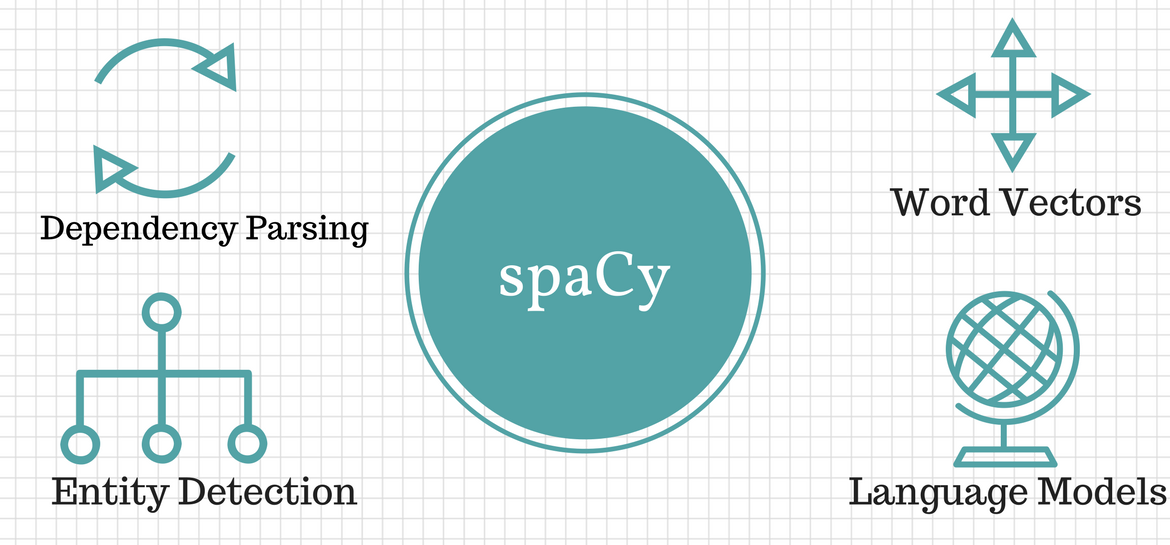

# Topics Overview

- comparison between spaCy and NLTK
- features of spaCy
- Basic Operations of spacy
- architecture of spaCy
- NLP pipeline of spaCy
- Basic operations of spaCY
    -  Tokenisation
    -  Lemmetisation
    -  Stopwords
    -  POS tagging and dependency
    -  noun chunks
    -  named entities
    -  word vectors and similarity
- Vocab, hashes, and lexemes
- NER With Transformers
- Text Classification
- References

# SpaCy vs NLTK


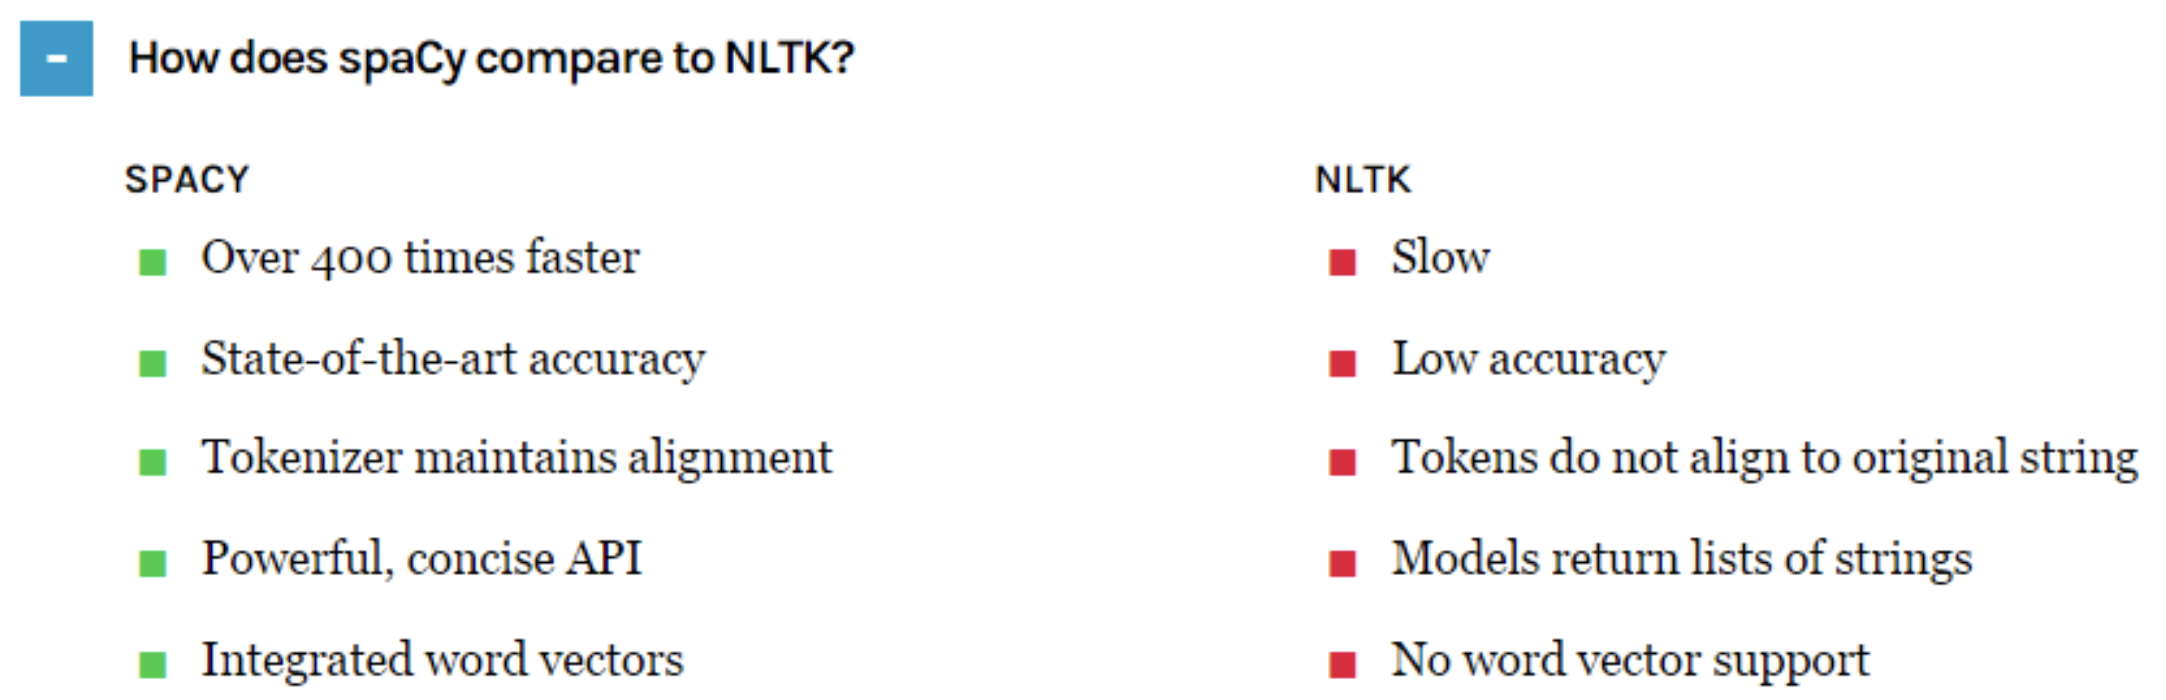

* NLTK provides a plethora of algorithms to choose from for a particular problem which is boon for a researcher but a bane for a developer. Whereas, **spaCy keeps the best algorithm for a problem** in its toolkit and keep it updated as state of the art improves.
* **NLTK supports various languages whereas spaCy have statistical models for 17 languages and tokenisation for 65 languages**. It also supports named entities for multi language.
* **NLTK is a string processing library.** It takes strings as input and returns strings or lists of strings as output. Whereas, **spaCy uses object-oriented approach. When we parse a text, spaCy returns document object whose words and sentences are objects themselves.**

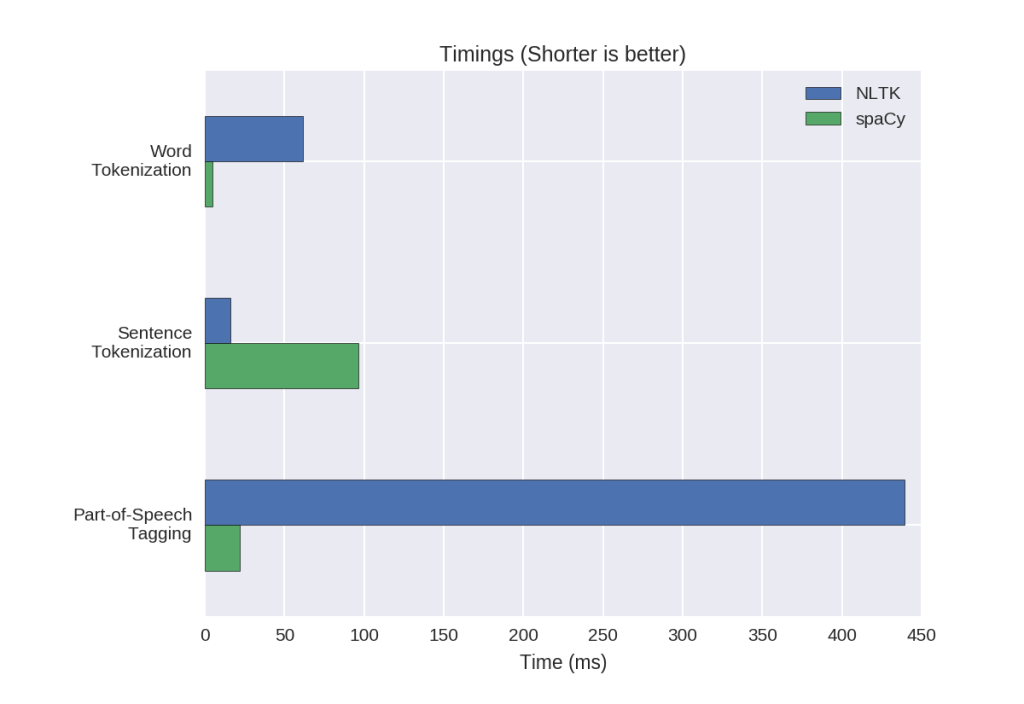

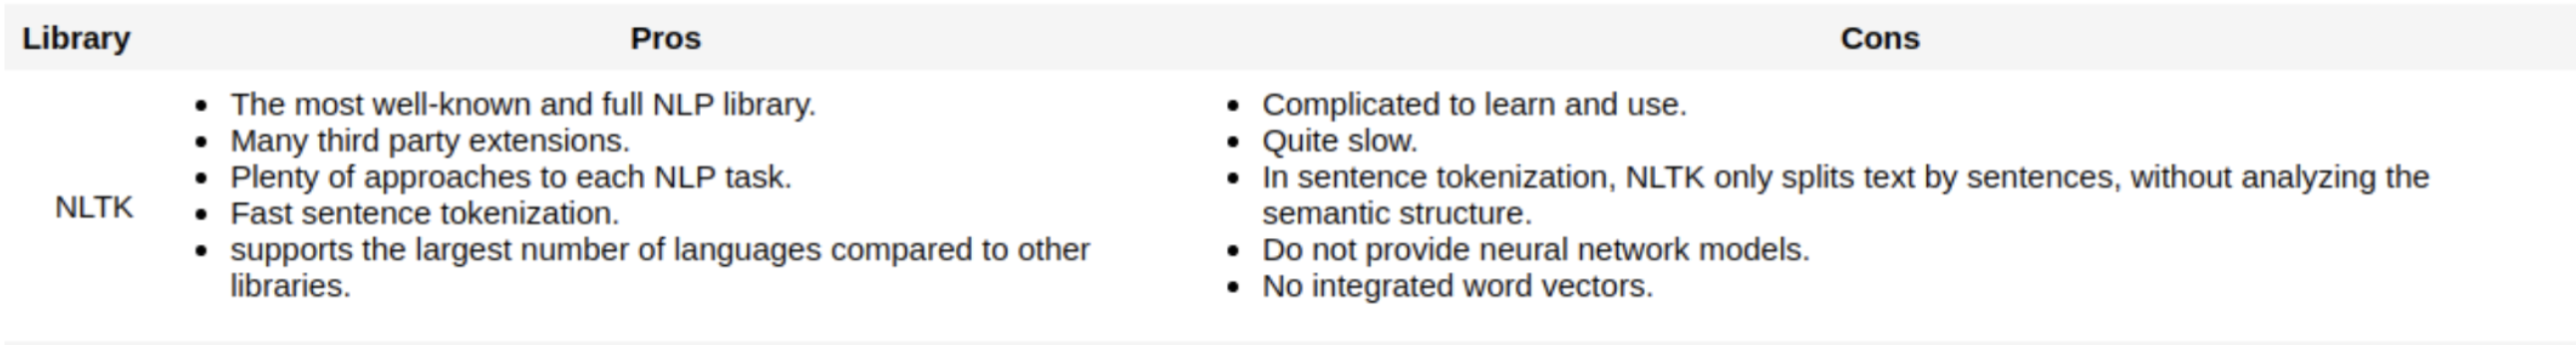

# spaCy Introduction

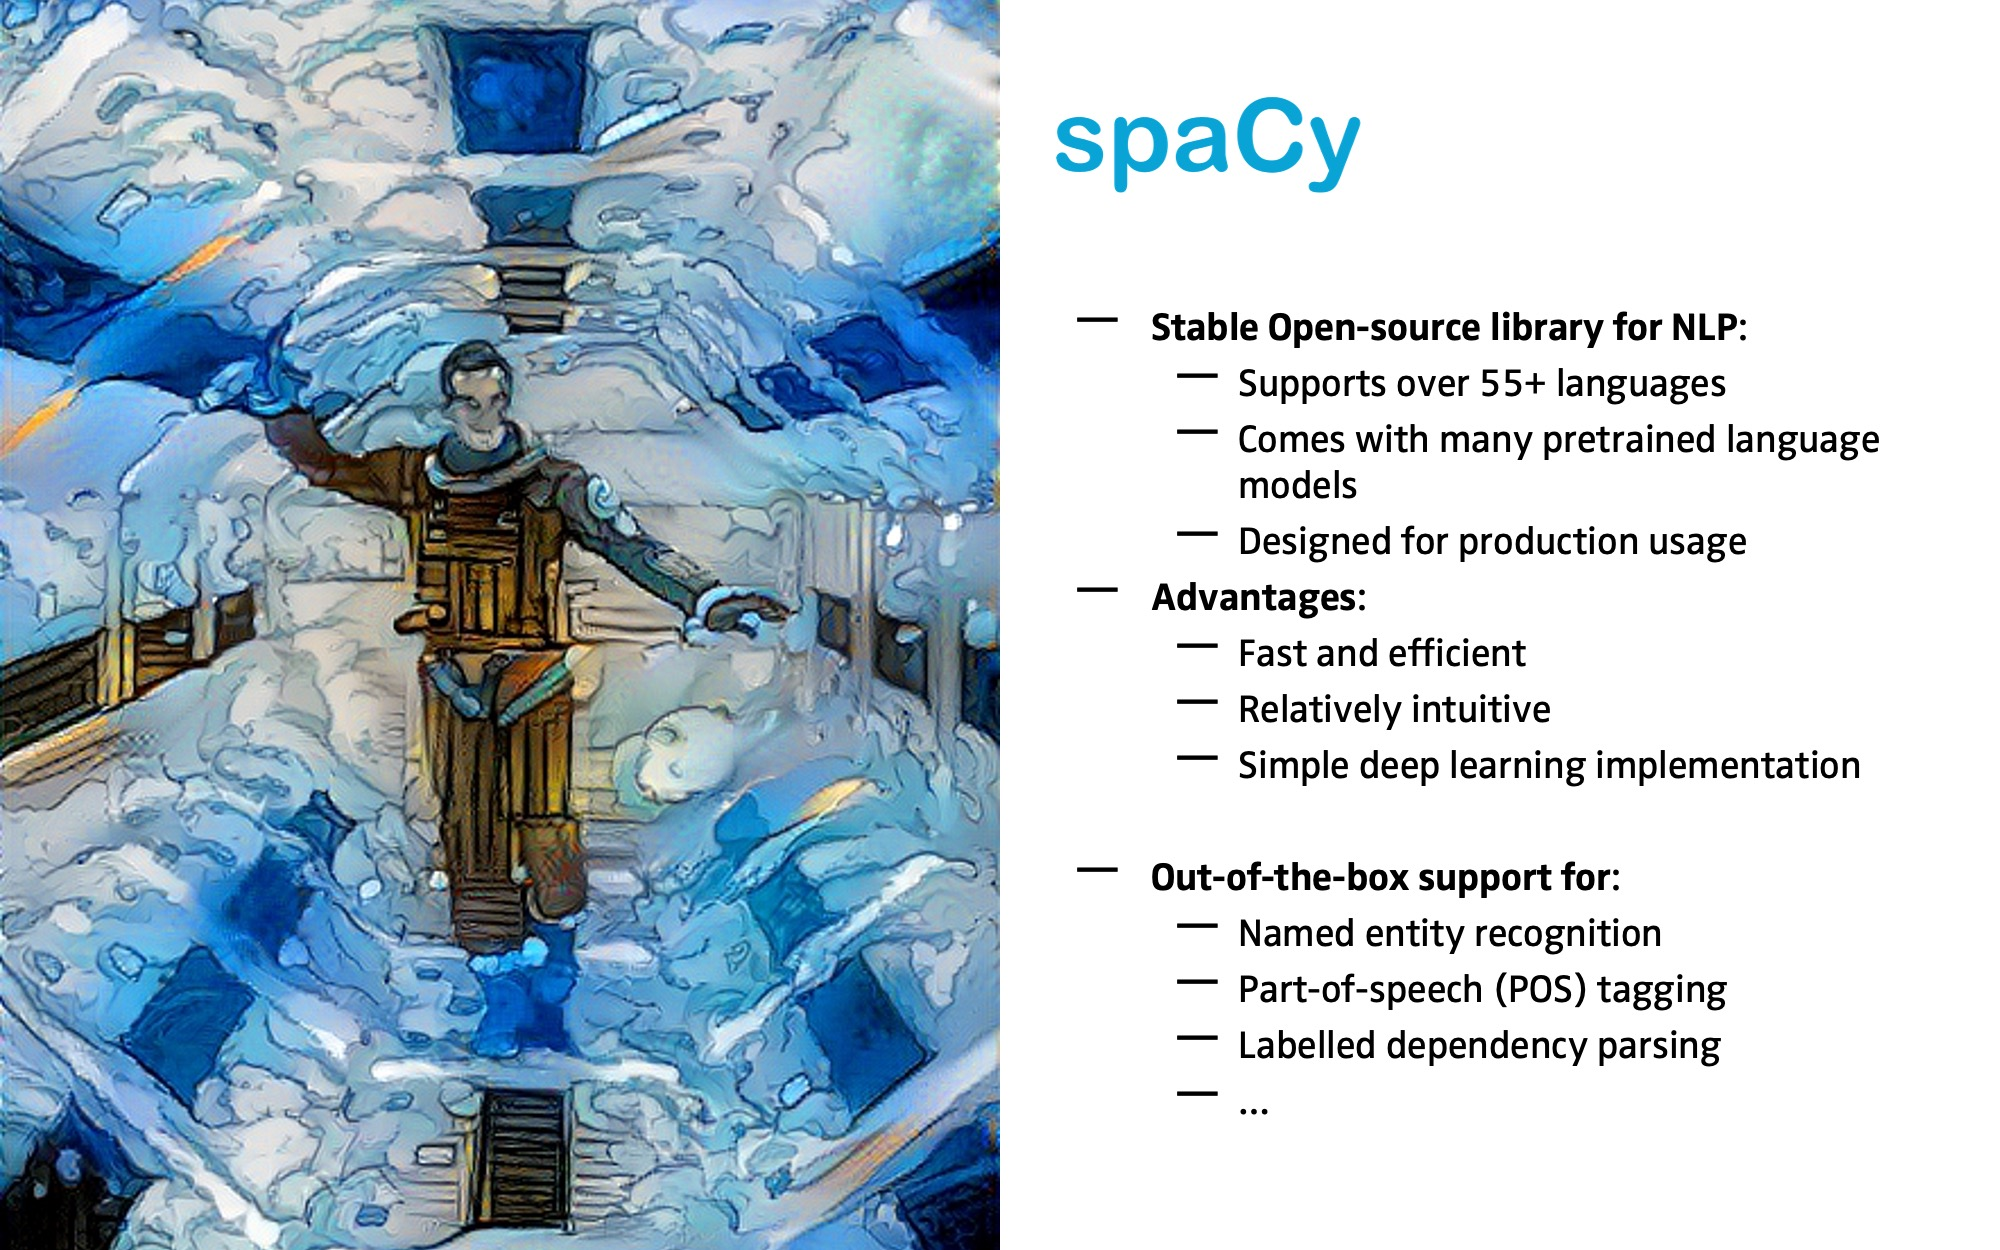

- spaCy is for advanced Natural Language Processing (NLP) in Python.

- spaCy is written in the programming languages Python and Cython. The library is published under the MIT license and its main developers are Matthew Honnibal and Ines Montani, the founders of the software company Explosion.

- If you’re working with a lot of text, you’ll eventually want to know more about it.

- spaCy helps you build applications that process and “understand” large volumes of text. It can be used to build information extraction or natural language understanding systems, or to pre-process text for deep learning.

- spaCy uses the latest and best algorithms, its performance is usually good as compared to NLTK.

- It is accurate: there are three pretrained english models to choose from, small, medium and large. As accuracy and speed change accordingly, this gives flexibility to balance them based on a given task.

# architecture diagram for the SpaCy

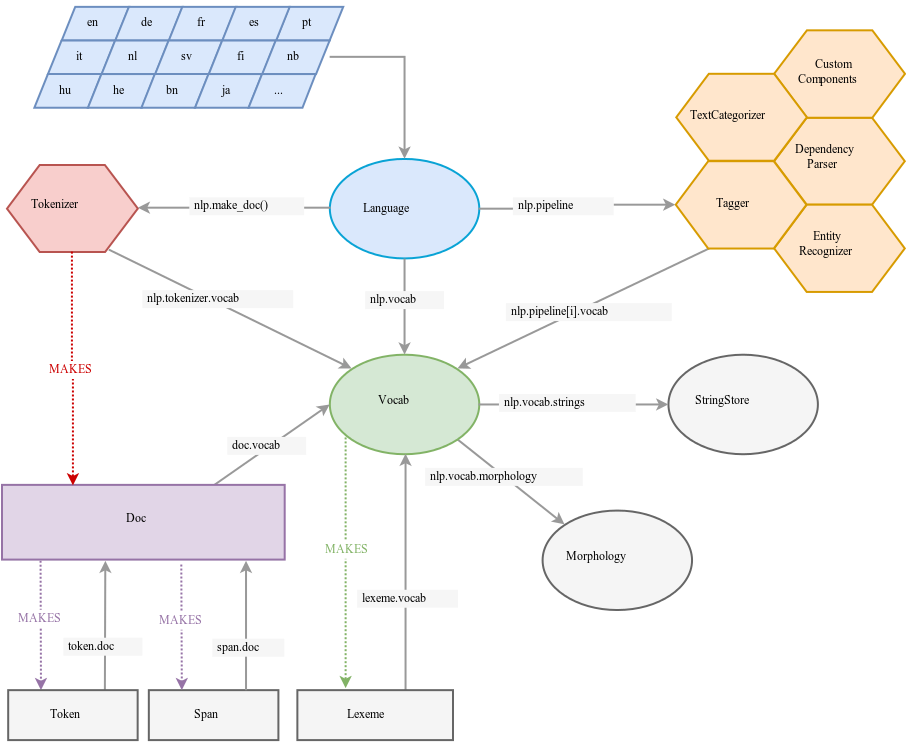

The central data structures in spaCy are the Language class, the Vocab and the Doc object. The Language class is used to process a text and turn it into a Doc object. It’s typically stored as a variable called nlp. The Doc object owns the sequence of tokens and all their annotations. By centralizing strings, word vectors and lexical attributes in the Vocab, we avoid storing multiple copies of this data. This saves memory, and ensures there’s a single source of truth.

Text annotations are also designed to allow a single source of truth: the Doc object owns the data, and Span and Token are views that point into it. The Doc object is constructed by the Tokenizer, and then modified in place by the components of the pipeline. The Language object coordinates these components. It takes raw text and sends it through the pipeline, returning an annotated document.

Doc: A container for accessing linguistic annotations.

Language: Processing class that turns text into Doc objects. Different languages implement their own subclasses of it. The variable is typically called nlp.

Vocab: The shared vocabulary that stores strings and gives you access to Lexeme objects.

Tokenizer: Segment raw text and create Doc objects from the words.

DependencyParser: Predict syntactic dependencies.

EntityRecognizer: Predict named entities, e.g. persons or products.

TextCategorizer: Predict categories or labels over the whole document.

Tagger: Predict part-of-speech tags.

Morphologizer: Predict morphological features and coarse-grained part-of-speech tags.

A morphologizer typically takes as input a word (maybe a word in the context of a surrounding sentence) and returns one or more "decompositions" of the word into "parts." The term "parts" can admit various definitions, but think of characteristics like:

Prefix: "un-" "re-", "a-"
Suffix: "-less", "tion"
Conjugation: "1st-person-plural-past-tense", "infinitive", etc.
Root: The "core form" of the word.

StringStore: maps strings to hash values, and vice versa, or a list of strings.

Lexeme: An entry in the vocabulary. It’s a word type with no context, as opposed to a word token. It therefore has no part-of-speech tag, dependency parse etc.

Span: A slice from a Doc object.

Token: An individual token — i.e. a word, punctuation symbol, whitespace, etc.

# NLP Pipeline

When you call nlp on a text, spaCy first tokenizes the text to produce a Doc object. The Doc is then processed in several different steps – this is also referred to as the processing pipeline. The pipeline used by the trained pipelines typically include a tagger, a lemmatizer, a parser and an entity recognizer. Each pipeline component returns the processed Doc, which is then passed on to the next component.

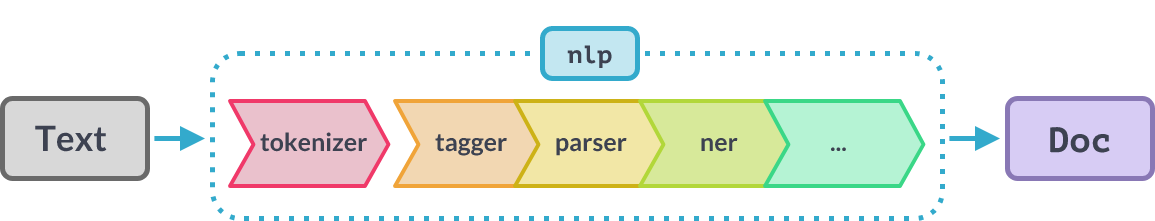

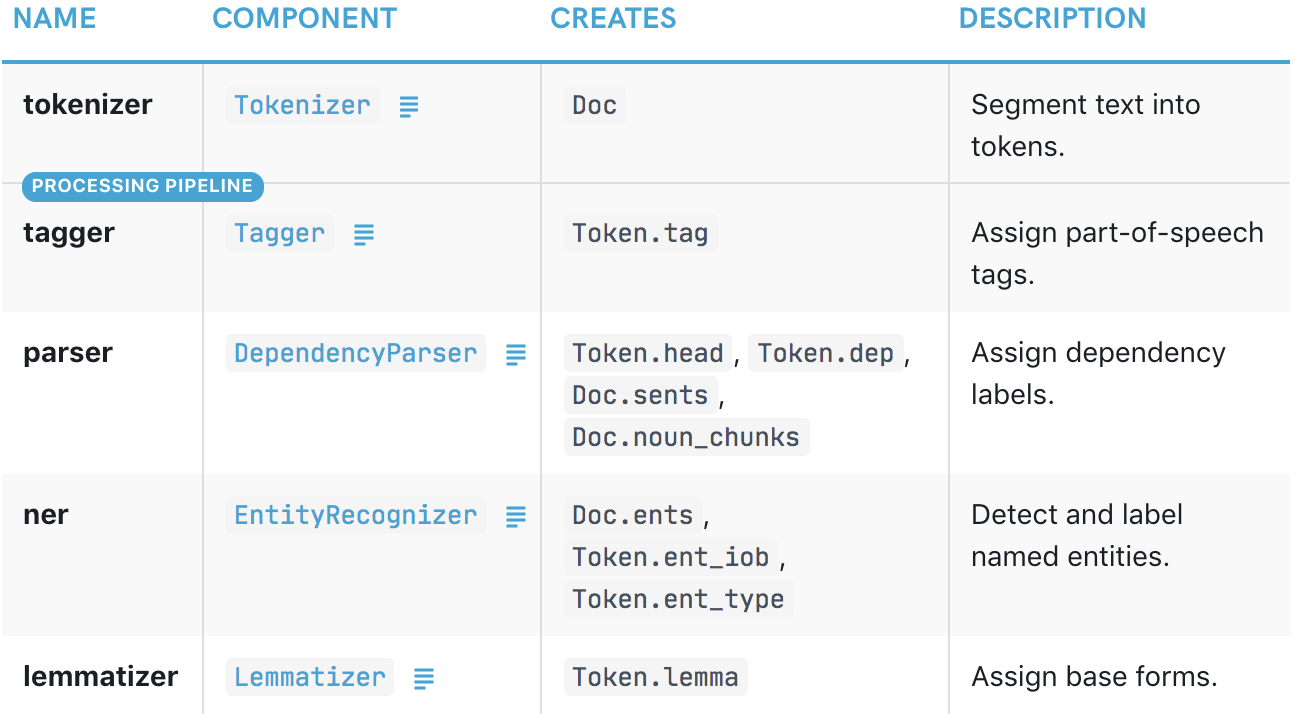

# Basic operations of spaCy

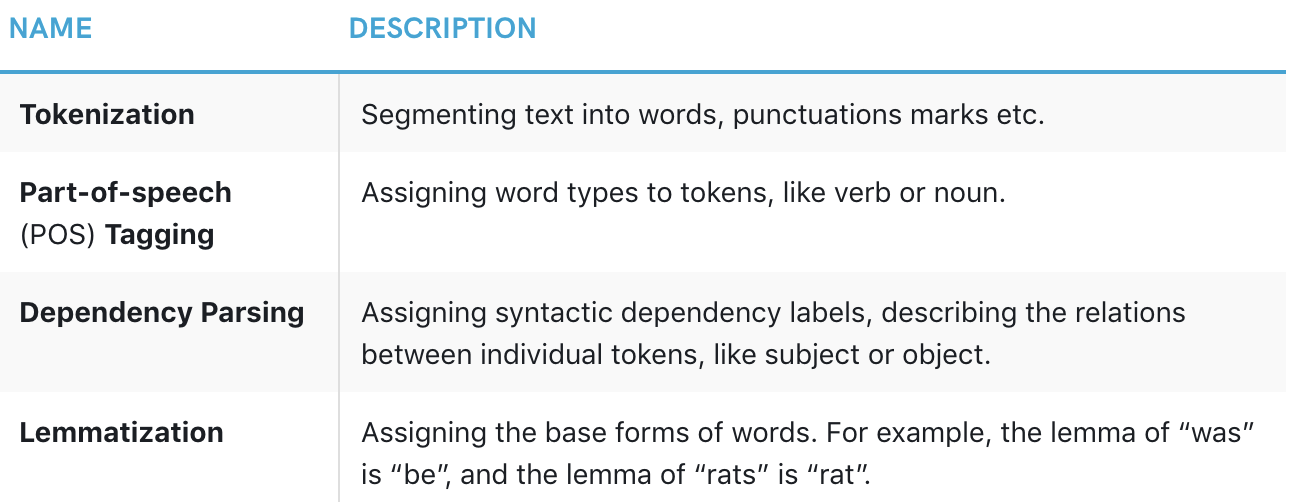

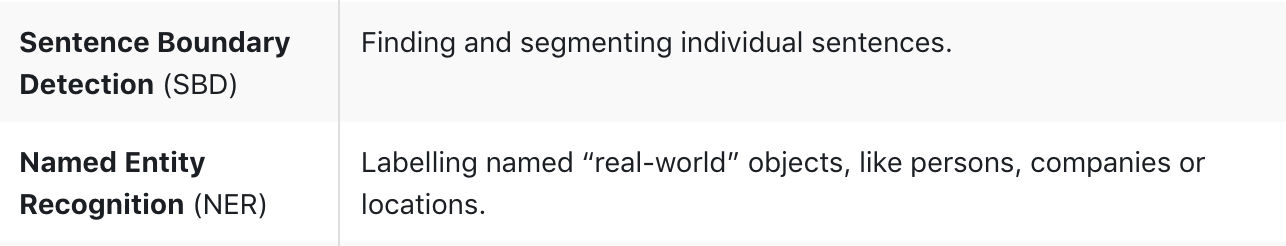

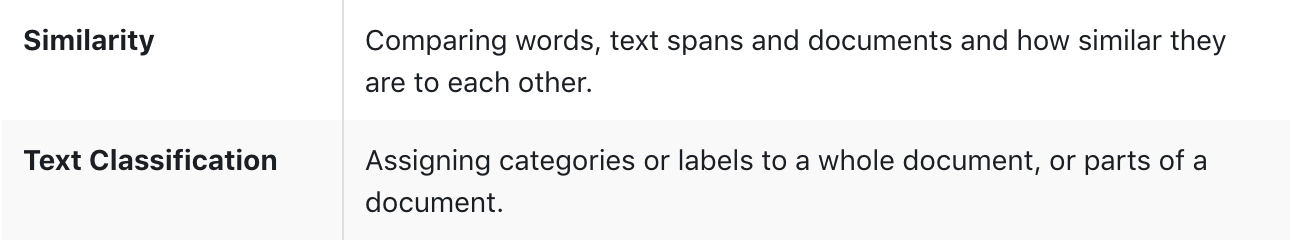

spaCy provides a variety of linguistic annotations to give you insights into a text’s grammatical structure. This includes the word types, like the parts of speech, and how the words are related to each other. For example, if you’re analyzing text, it makes a huge difference whether a noun is the subject of a sentence, or the object – or whether “google” is used as a verb, or refers to the website or company in a specific context.

Once you’ve downloaded and installed a trained pipeline, you can load it via spacy.load. This will return a Language object containing all components and data needed to process text. We usually call it nlp. Calling the nlp object on a string of text will return a processed Doc:

In [20]:
# !python3 -m spacy download en_core_web_lg
# !python3 -m spacy download en_core_web_md
# !python3 -m spacy download en_core_web_sm

### Tokenization

What is a Token?
A token is a single chopped up element of the sentence, which could be a word or a group of words to analyse. The task of chopping the sentence up is called "tokenisation".

Example: The following sentence can be tokenised by splitting up the sentence into individual words.

"Cytora is going to PyCon!"

["Cytora","is","going","to","PyCon!"]

During processing, spaCy first tokenizes the text, i.e. segments it into words, punctuation and so on. This is done by applying rules specific to each language. For example, punctuation at the end of a sentence should be split off – whereas “U.K.” should remain one token. Each Doc consists of individual tokens, and we can iterate over them:

In [21]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")
for token in doc:
    print(token.text)

Apple
is
looking
at
buying
U.K.
startup
for
$
1
billion


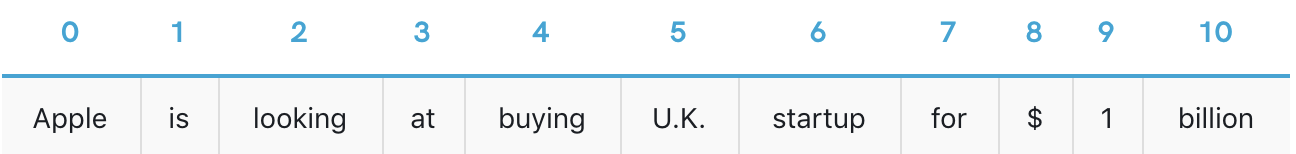

### Lemmatization

To do so, we need to use the lemma_ attribute on the spaCy document. 

In [22]:
sp = spacy.load('en_core_web_sm')

sentence6 = sp(u'compute computer computed computing')

for word in sentence6:
    print(word.text,  word.lemma_)

compute compute
computer computer
computed compute
computing compute


### Stop Words

Stop words are the common words in a vocabulary which are of little value when considering word frequencies in text. This is because they don't provide much useful information about what the sentence is telling the reader.

Example: "the","and","a","are","is"

In [23]:
nlp.Defaults.stop_words

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [24]:
## To add a single stopword:

nlp.Defaults.stop_words.add("my_new_stopword")
nlp.Defaults.stop_words

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [25]:
## To add several stopwords at once:

nlp.Defaults.stop_words |= {"my_new_stopword1","my_new_stopword2",}
nlp.Defaults.stop_words

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [26]:
## To remove a single stopword:

nlp.Defaults.stop_words.remove("my_new_stopword")
nlp.Defaults.stop_words

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [27]:
## To remove several stopwords at once:

nlp.Defaults.stop_words -= {"my_new_stopword1", "my_new_stopword2"}
nlp.Defaults.stop_words

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [28]:
if nlp.vocab["the"].is_stop == True:
    print("Its stopword")
else:
    print("Its not stopword")

Its stopword


In [29]:
nlp.vocab["the"].is_stop = False
nlp.vocab["definitelynotastopword"].is_stop = True

sentence = nlp("the word is definitelynotastopword")

print(sentence[0].is_stop)
print(sentence[3].is_stop)

False
True


### Part-of-speech tags and dependencies 

After tokenization, spaCy can parse and tag a given Doc.

Like many NLP libraries, spaCy encodes all strings to hash values to reduce memory usage and improve efficiency. So to get the readable string representation of an attribute, we need to add an underscore _ to its name:

In [30]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop)

Apple Apple PROPN NNP nsubj Xxxxx True False
is be AUX VBZ aux xx True True
looking look VERB VBG ROOT xxxx True False
at at ADP IN prep xx True True
buying buy VERB VBG pcomp xxxx True False
U.K. U.K. PROPN NNP dobj X.X. False False
startup startup NOUN NN advcl xxxx True False
for for ADP IN prep xxx True True
$ $ SYM $ quantmod $ False False
1 1 NUM CD compound d False False
billion billion NUM CD pobj xxxx True False


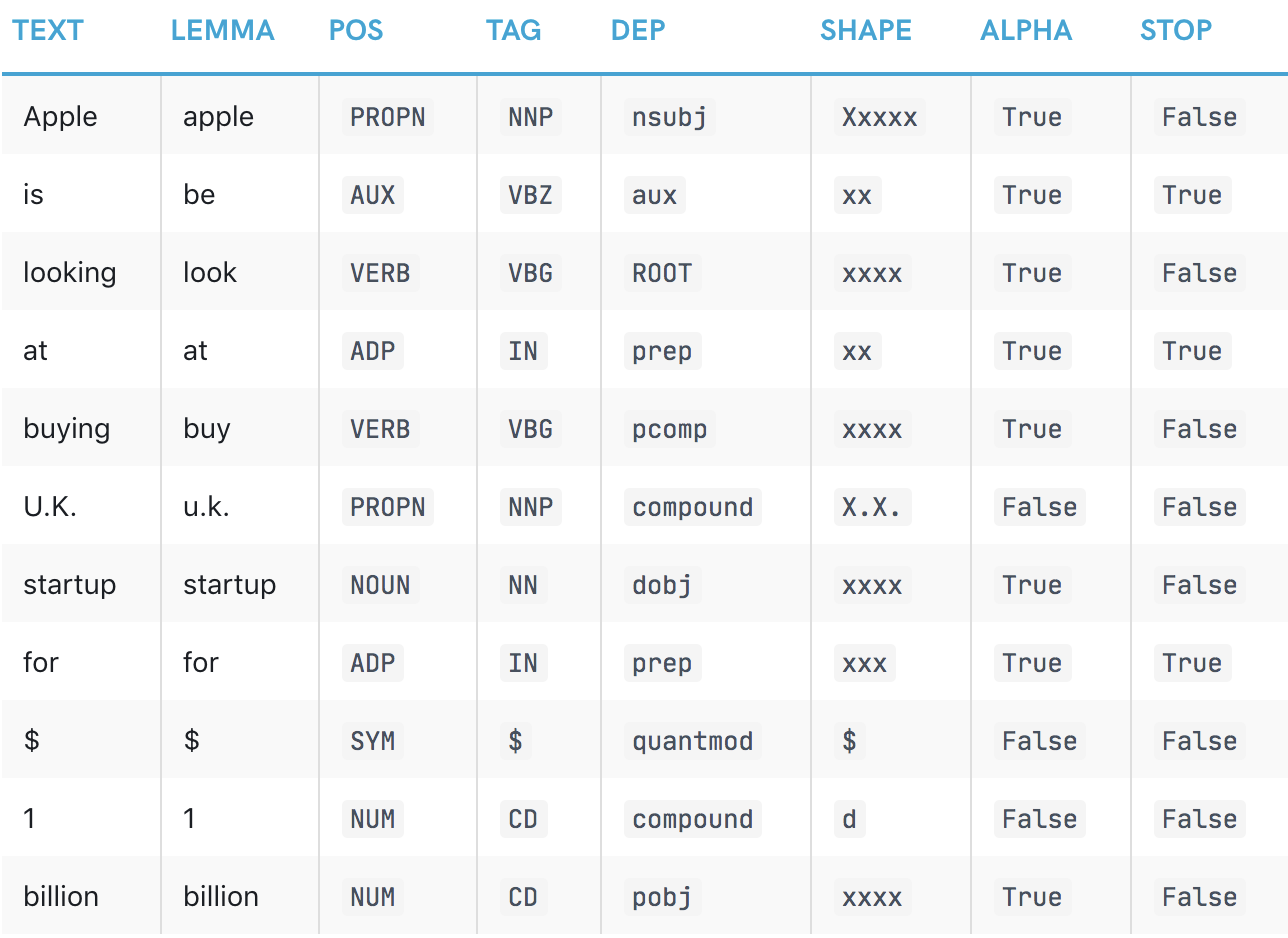

In [31]:
from spacy import displacy
nlp = spacy.load('en_core_web_sm')
spacy.displacy.serve(doc, style='dep')

/Applications/anaconda3/lib/python3.7/site-packages/spacy/displacy/__init__.py:97: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


### Noun chunks

What is a Noun Chunk?

Noun chunks are the phrases based upon nouns recovered from tokenized text using the speech tags.

Example:

The sentence "The boy saw the yellow dog" has 2 noun objects, the boy and the dog. Therefore the noun chunks will be

1. "The boy"
2. "the yellow dog"

In [32]:
doc_2 = nlp(u'''I went to Paris where I met my old friend Jack from uni. 
            Apple is looking at buying U.K. startup for $1 billion''')
print([chunk for chunk in doc_2.noun_chunks])

[I, Paris, I, my old friend, Jack, uni, 
            Apple, U.K.]


### Named Entities 

A named entity is a “real-world object” that’s assigned a name – for example, a person, a country, a product or a book title. spaCy can recognize various types of named entities in a document, by asking the model for a prediction.

Named entities are available as the ents property of a Doc:

In [33]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Apple 0 5 ORG
U.K. 27 31 GPE
$1 billion 44 54 MONEY


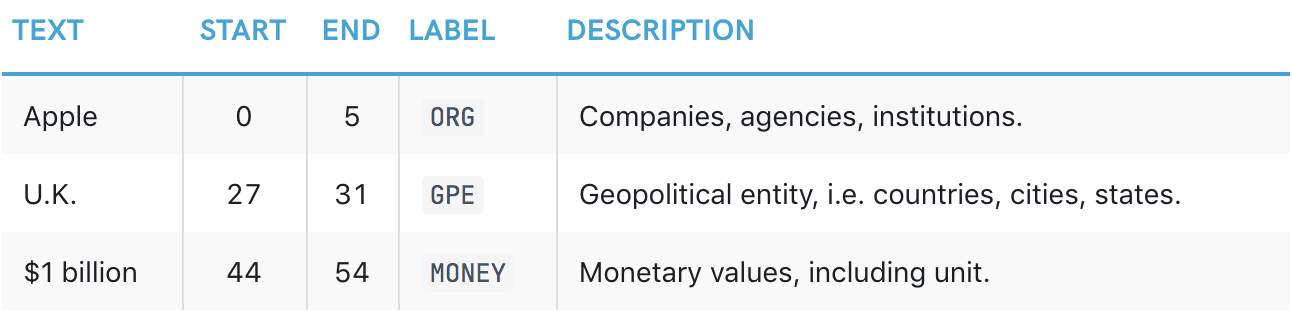

In [34]:
from spacy import displacy
displacy.render(doc, style = "ent",jupyter = True)

### Word vectors and similarity 

What are Word embeddings?

A word embedding is a representation of a word, and by extension a whole language corpus, in a vector or other form of numerical mapping. This allows words to be treated numerically with word similarity represented as spatial difference in the dimensions of the word embedding mapping.

Similarity is determined by comparing word vectors or “word embeddings”, multi-dimensional meaning representations of a word. Word vectors can be generated using an algorithm like word2vec and usually look like this:

In [35]:
import spacy

nlp = spacy.load("en_core_web_lg")
tokens = nlp("dog cat banana afskfsd")

for token in tokens:
    print(token.text, token.has_vector, token.vector_norm, token.is_oov)

dog True 7.0336733 False
cat True 6.6808186 False
banana True 6.700014 False
afskfsd False 0.0 True


Text: The original token text.

has vector: Does the token have a vector representation?

Vector norm: The L2 norm of the token’s vector (the square root of the sum of the values squared)

OOV: Out-of-vocabulary

In [36]:
import spacy

nlp = spacy.load("en_core_web_lg")  # make sure to use larger package!
doc1 = nlp("I like salty fries and hamburgers.")
doc2 = nlp("Fast food tastes very good.")

# Similarity of two documents
print(doc1, "<->", doc2, doc1.similarity(doc2))
# Similarity of tokens and spans
french_fries = doc1[2:4]
burgers = doc1[5]
print(french_fries, "<->", burgers, french_fries.similarity(burgers))

I like salty fries and hamburgers. <-> Fast food tastes very good. 0.7687607012190486
salty fries <-> hamburgers 0.6949788


In [37]:
nlp = spacy.load('en_core_web_lg')
print(nlp.vocab['banana'].vector)

[ 2.0228e-01 -7.6618e-02  3.7032e-01  3.2845e-02 -4.1957e-01  7.2069e-02
 -3.7476e-01  5.7460e-02 -1.2401e-02  5.2949e-01 -5.2380e-01 -1.9771e-01
 -3.4147e-01  5.3317e-01 -2.5331e-02  1.7380e-01  1.6772e-01  8.3984e-01
  5.5107e-02  1.0547e-01  3.7872e-01  2.4275e-01  1.4745e-02  5.5951e-01
  1.2521e-01 -6.7596e-01  3.5842e-01 -4.0028e-02  9.5949e-02 -5.0690e-01
 -8.5318e-02  1.7980e-01  3.3867e-01  1.3230e-01  3.1021e-01  2.1878e-01
  1.6853e-01  1.9874e-01 -5.7385e-01 -1.0649e-01  2.6669e-01  1.2838e-01
 -1.2803e-01 -1.3284e-01  1.2657e-01  8.6723e-01  9.6721e-02  4.8306e-01
  2.1271e-01 -5.4990e-02 -8.2425e-02  2.2408e-01  2.3975e-01 -6.2260e-02
  6.2194e-01 -5.9900e-01  4.3201e-01  2.8143e-01  3.3842e-02 -4.8815e-01
 -2.1359e-01  2.7401e-01  2.4095e-01  4.5950e-01 -1.8605e-01 -1.0497e+00
 -9.7305e-02 -1.8908e-01 -7.0929e-01  4.0195e-01 -1.8768e-01  5.1687e-01
  1.2520e-01  8.4150e-01  1.2097e-01  8.8239e-02 -2.9196e-02  1.2151e-03
  5.6825e-02 -2.7421e-01  2.5564e-01  6.9793e-02 -2

In [38]:
banana = nlp.vocab['banana']
dog = nlp.vocab['dog']
fruit = nlp.vocab['fruit']
animal = nlp.vocab['animal']
 
print(dog.similarity(animal), dog.similarity(fruit)) 
print(banana.similarity(fruit), banana.similarity(animal)) 

0.66185343 0.23552851
0.67148364 0.24272855


In [39]:
target = nlp("Cats are beautiful animals.")
 
doc1 = nlp("Dogs are awesome.")
doc2 = nlp("Some gorgeous creatures are felines.")
doc3 = nlp("Dolphins are swimming mammals.")
 
print(target.similarity(doc1))  
print(target.similarity(doc2))  
print(target.similarity(doc3))  

0.8901766262114666
0.9115828449161616
0.7822956256736615


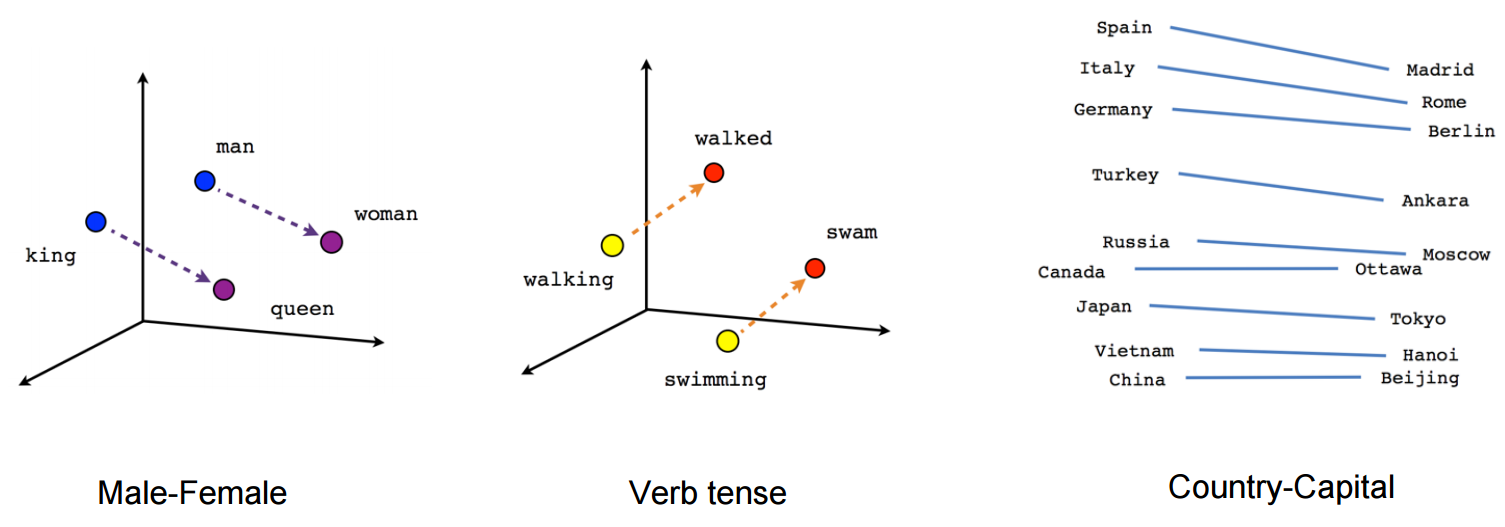

In [40]:
from scipy import spatial
nlp = spacy.load("en_core_web_lg") 

cosine_similarity = lambda x, y: 1 - spatial.distance.cosine(x, y)
 
man = nlp.vocab['man'].vector
woman = nlp.vocab['woman'].vector
queen = nlp.vocab['queen'].vector
king = nlp.vocab['king'].vector
 
# We now need to find the closest vector in the vocabulary to the result of "man" - "woman" + "queen"
maybe_king = man - woman + queen # apple-laptop=may be apple fruit
computed_similarities = []

print(len(nlp.vocab))

for word in nlp.vocab:
    # Ignore words without vectors
    if not word.has_vector:
        continue
 
    similarity = cosine_similarity(maybe_king, word.vector)
    computed_similarities.append((word, similarity)) 
    
#print(computed_similarities) 
computed_similarities = sorted(computed_similarities, key=lambda item: -item[1])# - means print in decsending order
print([w[0].text for w in computed_similarities[:10]]) # w[0] indicates word for object

765
['queen', 'king', 'man', 'Mr', 'Mr.', 'He', 'he', 'cuz', 'Cuz', 'Let']


Surprisingly, the closest word vector in the vocabulary for “man” – “woman” + “queen” is still “Queen” but “King” comes right after.

# Vocab, hashes and lexemes

Whenever possible, spaCy tries to store data in a vocabulary, the Vocab, that will be shared by multiple documents. To save memory, spaCy also encodes all strings to hash values – in this case for example, “coffee” has the hash 3197928453018144401. Entity labels like “ORG” and part-of-speech tags like “VERB” are also encoded. Internally, spaCy only “speaks” in hash values.

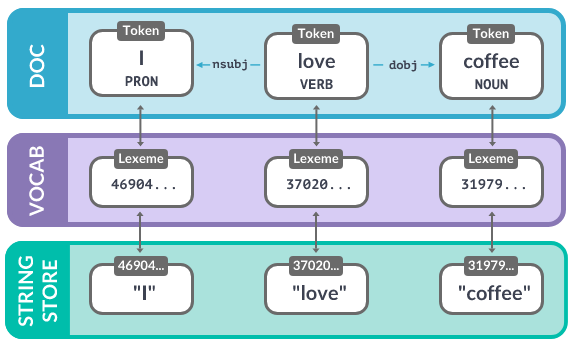

If you process lots of documents containing the word “coffee” in all kinds of different contexts, storing the exact string “coffee” every time would take up way too much space. So instead, spaCy hashes the string and stores it in the StringStore. You can think of the StringStore as a lookup table that works in both directions – you can look up a string to get its hash, or a hash to get its string:

In [41]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("I love coffee")
print(doc.vocab.strings["coffee"])  
print(doc.vocab.strings[3197928453018144401])  

3197928453018144401
coffee


In [42]:
import spacy
from spacy.tokens import Doc
from spacy.vocab import Vocab

nlp = spacy.load("en_core_web_sm")
doc = nlp("I love coffee")  # Original Doc
print(doc.vocab.strings["coffee"])  # 3197928453018144401
print(doc.vocab.strings[3197928453018144401])  # 'coffee' 

3197928453018144401
coffee


Now that all strings are encoded, the entries in the vocabulary don’t need to include the word text themselves. Instead, they can look it up in the StringStore via its hash value. Each entry in the vocabulary, also called Lexeme, contains the context-independent information about a word. For example, no matter if “love” is used as a verb or a noun in some context, its spelling and whether it consists of alphabetic characters won’t ever change. Its hash value will also always be the same.

In [43]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("I love coffee")
for word in doc:
    lexeme = doc.vocab[word.text]
    print(lexeme.text, lexeme.orth, lexeme.shape_, lexeme.prefix_, lexeme.suffix_,
            lexeme.is_alpha, lexeme.is_digit, lexeme.is_title, lexeme.lang_)

I 4690420944186131903 X I I True False True en
love 3702023516439754181 xxxx l ove True False False en
coffee 3197928453018144401 xxxx c fee True False False en


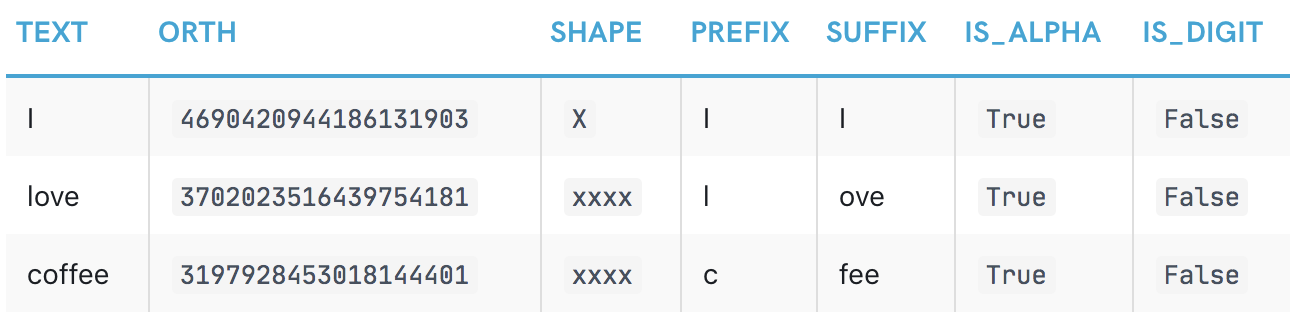

Text: The original text of the lexeme.

Orth: The hash value of the lexeme.

Shape: The abstract word shape of the lexeme.

Prefix: By default, the first letter of the word string.

Suffix: By default, the last three letters of the word string.

is alpha: Does the lexeme consist of alphabetic characters?

is digit: Does the lexeme consist of digits?

# NER With Transformers 

Transformers are the hottest thing since sliced bread in NLP. Since their introduction in 2017–18, they’ve come to dominate NLP benchmarks.

SpaCy introduced the spacy-transformers library in 2019 [1]. It connects spaCy to HuggingFace’s transformers library — allowing us to use NER as usual — but powered by cutting-edge transformer models.

### Installation
We get started by first installing spacy-transformers using:

In [ ]:
!pip install spacy[transformers]

In [ ]:
!pip install spacy-transformers

In [ ]:
!python -m spacy download en_core_web_trf

     |█▊                              | 24.9 MB 2.0 MB/s eta 0:03:33     |█▌                              | 21.9 MB 1.4 MB/s eta 0:05:20^C

ERROR: Operation cancelled by user

Aborted!


### Initializing A spaCy Transformer

Now that we’ve installed spacy-transformers, we can start using the transformer models in the same way that we’d usually use spaCy models.
The only exception here is that we download and initialize a spaCy transformer model — rather than the usual models.

We download the roBERTa-base model with:

python -m spacy download en_core_web_trf # on command prompt

Then initialize it in Python with:

In [ ]:
import spacy
from spacy import displacy

In [ ]:
nlp_trf = spacy.load('en_core_web_trf')

In [ ]:
nlp = spacy.load('en_core_web_lg')

In [ ]:
txt='''Apple reached an all-time high stock price of 143 dollars this January.'''

In [ ]:
doc = nlp_trf(txt)
displacy.render(doc,style='ent')

In [ ]:
doc = nlp(txt)
displacy.render(doc,style='ent')

Here we can see no difference between the two models — which we should expect for a fair number of samples as the traditional model en_core_web_lg is still a very high-performance model.

In [ ]:
txt='''Fastly released its Q1-21 performance on Thursday, after which the stock price dropped a whopping 27%. The company generated revenues of $84.9 million (35% YoY) vs. $85.1 million market consensus. Net loss per share was $0.12 vs. an expected $0.11.
These are not big misses but make the company one of the few high-growth cloud players that underperformed market expectations.
However, the company also lowered its guidance for Q2: Fastly forecasts revenues of $84 - $87 million and a net loss of $0.16 - $0.19 per share, compared to the market consensus of $92 million in revenue and a net loss of $0.08 per share, thereby disappointing investors.
Lastly, Adriel Lares will step down as CFO of the company after 5 years.'''

In [ ]:
doc = nlp_trf(txt)
displacy.render(doc,style='ent')

In [ ]:
doc = nlp(txt)
displacy.render(doc,style='ent')

Now we see a difference:

# Text Classification

In [109]:
import pandas as pd
import numpy as np # linear algebra
import seaborn as sns
import matplotlib.pyplot as plt
import base64
import string
import re
from collections import Counter
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [110]:
df = pd.read_csv('research_paper.csv')
df.head()

Title Conference
0  Innovation in Database Management: Computer Sc...       VLDB
1  High performance prime field multiplication fo...      ISCAS
2  enchanted scissors: a scissor interface for su...   SIGGRAPH
3  Detection of channel degradation attack by Int...    INFOCOM
4  Pinning a Complex Network through the Betweenn...      ISCAS

In [111]:
df.shape

(2507, 2)

## EDA

In [112]:
df.isnull().sum()

Title         0
Conference    0
dtype: int64

In [113]:
df['Conference'].nunique()

5

In [114]:
df['Conference'].unique()

array(['VLDB', 'ISCAS', 'SIGGRAPH', 'INFOCOM', 'WWW'], dtype=object)

In [115]:
df.iloc[1][0], df.iloc[1][1]

('High performance prime field multiplication for GPU.', 'ISCAS')

In [116]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.30, random_state=42)

In [117]:
train

Title Conference
2239  From user-centric web traffic data to usage data.        WWW
358   SHARC: Framework for Quality-Conscious Web Arc...       VLDB
2257  A Low-Noise Preamplifier with Adjustable Gain ...      ISCAS
8     Automatic sanitization of social network data ...        WWW
1510  A Theoretical Analysis of Split Delta-Sigma ADCs.      ISCAS
...                                                 ...        ...
1638  Data Markets in the Cloud: An Opportunity for ...       VLDB
1095  Temporal summarization of event-related update...        WWW
1130  Visualization technologies as a tool for scien...   SIGGRAPH
1294  DNA-like Learning Algorithm of CNN Template Im...      ISCAS
860     Avatara: OLAP for Web-scale Analytics Products.       VLDB

[1754 rows x 2 columns]

In [118]:
test

Title Conference
2121  Architectural Issues in Distributed Data Base ...       VLDB
56             Compressive sampling of EMG bio-signals.      ISCAS
2479   User-Centered Modeling of Interactive Web Sites.        WWW
1292  A Decomposition Method for Transmission Schedu...    INFOCOM
1599  ASCENT: Adaptive Self-Configuring sEnsor Netwo...    INFOCOM
...                                                 ...        ...
263                                         Steel life.   SIGGRAPH
1463  Bonding-wire triangular spiral inductor for on...      ISCAS
2166   Algorithmic Solution to Second-order Fluid Flow.    INFOCOM
807   SocialFilter: Introducing social trust to coll...    INFOCOM
415                  Feature-based image metamorphosis.   SIGGRAPH

[753 rows x 2 columns]

In [119]:
print('Research title sample:', train['Title'].iloc[0])
print('Conference of this paper:', train['Conference'].iloc[0])
print('Training Data Shape:', train.shape)
print('Testing Data Shape:', test.shape)

Research title sample: From user-centric web traffic data to usage data.
Conference of this paper: WWW
Training Data Shape: (1754, 2)
Testing Data Shape: (753, 2)


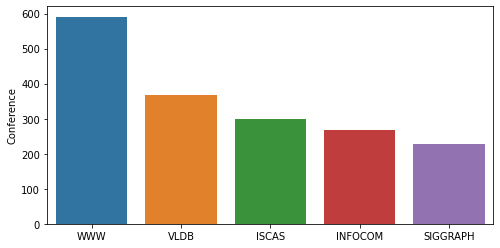

In [120]:
fig = plt.figure(figsize=(8,4))
sns.barplot(x = train['Conference'].unique(), y=train['Conference'].value_counts())
plt.show()

In [121]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

## Preprocessing

In [151]:
import spacy

nlp = spacy.load('en_core_web_sm')
punctuations = string.punctuation

In [152]:
# Define function to cleanup text by removing personal pronouns, stopwords, and puncuation
def cleanup_text(docs, logging=True):
    texts = []
    counter = 1
    for doc in docs:
        if counter % 1000 == 0 and logging:
            print(f"Processed {counter} out of {len(docs)} documents." )
        counter += 1
        doc = nlp(doc, disable=['parser', 'ner'])
        tokens = [tok.lemma_.lower().strip() for tok in doc if tok.lemma_ != '-PRON-']
        tokens = [tok for tok in tokens if tok not in stop and tok not in punctuations]
#         print(tokens)
#         print('\n')
        tokens = ' '.join(tokens)
#         print(tokens)
#         print('\n')
        texts.append(tokens)
#         print(texts)
#         print('\n')
    return pd.Series(texts)

In [153]:
# docs = '''Unlike verbs and common nouns, there's no clear base form of a personal pronoun. 
# Should the lemma of "me" be "I", or should we normalize person as well, giving "it" — or maybe "he"? 
# spaCy's solution is to introduce a novel symbol, -PRON-, 
# which is used as the lemma for all personal pronouns.'''

# cleanup_text(docs, logging=True)

In [154]:
def plot_most_common_words(tag): #WWW
    text = [text for text in train[ train['Conference'] == tag  ]['Title']]

    clean = cleanup_text(text)
#     print(clean)
#     print('-'*80)
    clean = ' '.join(clean).split()
#     print(clean)
        
    counts = Counter(clean)
    # W:fre
    
    common_words = [word[0] for word in counts.most_common(20)]
    common_counts = [word[1] for word in counts.most_common(20)]

    fig = plt.figure(figsize=(18,6))
    sns.barplot(x=common_words, y=common_counts)
    plt.title('Most Common Words used in the research papers for conference {}'.format(tag))
    plt.show()

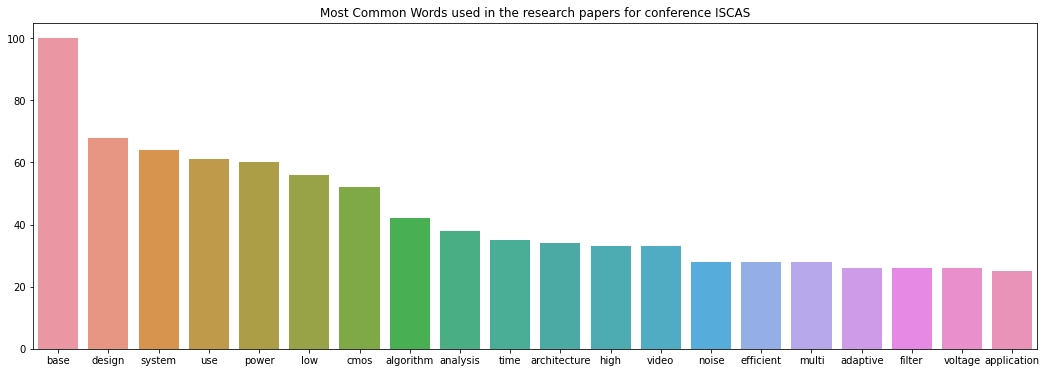

In [155]:
plot_most_common_words('ISCAS')

In [133]:
train['Conference'].unique()

array(['WWW', 'VLDB', 'ISCAS', 'INFOCOM', 'SIGGRAPH'], dtype=object)

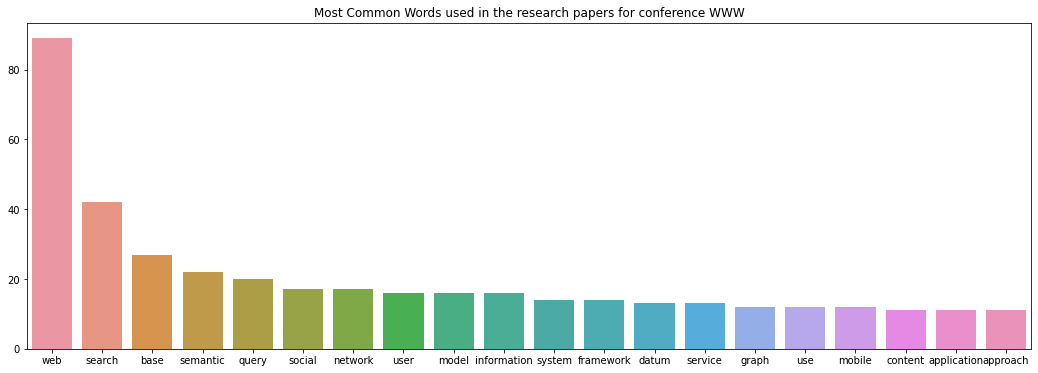

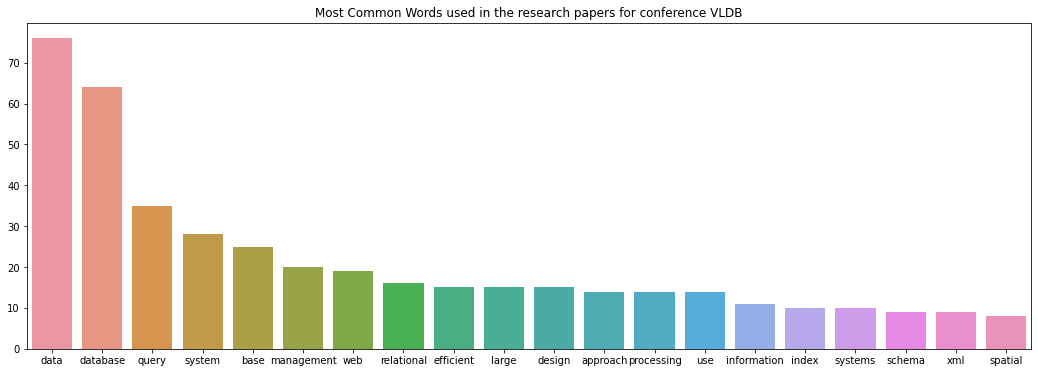

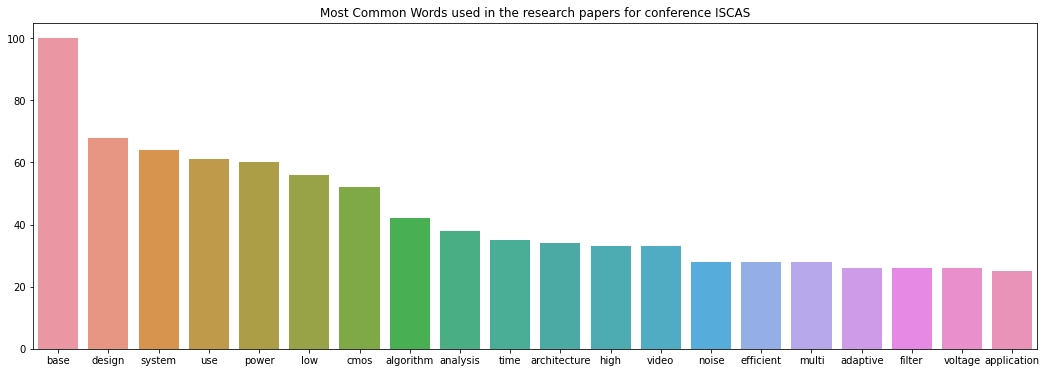

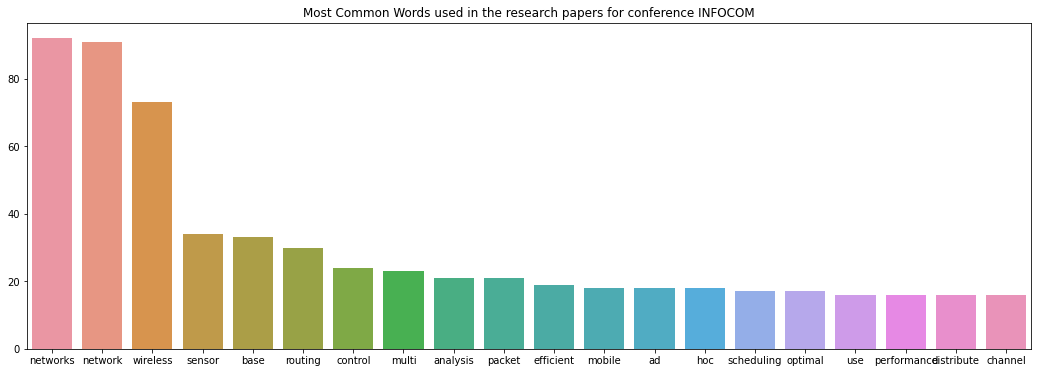

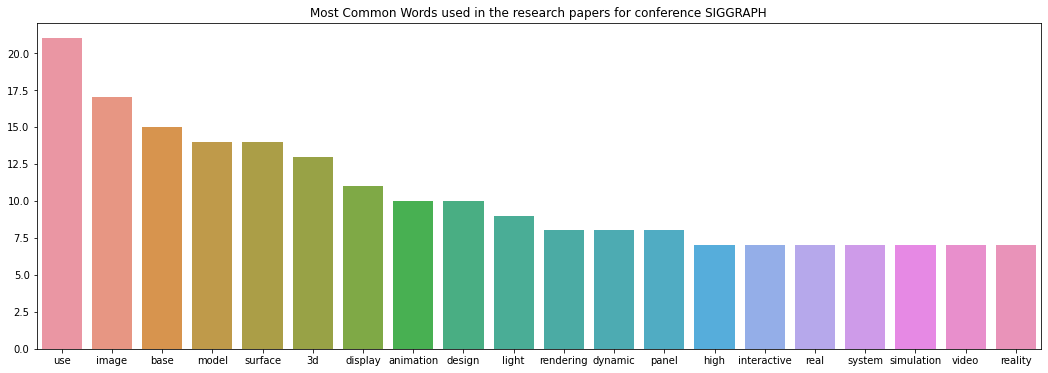

In [134]:
for tag in train['Conference'].unique():
    plot_most_common_words(tag)

In [135]:
test.head()

Title Conference
2121  Architectural Issues in Distributed Data Base ...       VLDB
56             Compressive sampling of EMG bio-signals.      ISCAS
2479   User-Centered Modeling of Interactive Web Sites.        WWW
1292  A Decomposition Method for Transmission Schedu...    INFOCOM
1599  ASCENT: Adaptive Self-Configuring sEnsor Netwo...    INFOCOM

In [136]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from sklearn.metrics import accuracy_score
import spacy
nlp = spacy.load("en_core_web_sm")

In [137]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [138]:
STOPLIST = set(stopwords.words('english') + list(ENGLISH_STOP_WORDS))
SYMBOLS = " ".join( string.punctuation).split(" ") + ["-", "...", "”", "”"]

In [139]:
class CleanTextTransformer(TransformerMixin):
    def transform(self, X, **transform_params):
        return [cleanText(text) for text in X]
    def fit(self, X, y=None, **fit_params):
        return self
    def get_params(self, deep=True):
        return {}
    
def cleanText(text):
    text = text.strip().replace("\n", " ").replace("\r", " ")
    text = text.lower()
    return text

def tokenizeText(sample):
    tokens = nlp(sample)
    lemmas = []
    for tok in tokens:
        lemmas.append(tok.lemma_.lower().strip())
    tokens = lemmas
    tokens = [tok for tok in tokens if tok not in STOPLIST]
    tokens = [tok for tok in tokens if tok not in SYMBOLS]
    return tokens

In [140]:
vectorizer = CountVectorizer(tokenizer=tokenizeText, ngram_range=(1,1))
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
#https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/


clf = LinearSVC()
pipe = Pipeline([('cleanText', CleanTextTransformer()), ('vectorizer', vectorizer), ('clf', clf)])

# data
train1 = train['Title'].tolist()
labelsTrain1 = train['Conference'].tolist()

test1 = test['Title'].tolist()
labelsTest1 = test['Conference'].tolist()


# train
pipe.fit(train1, labelsTrain1)


# test
preds = pipe.predict(test1)
print("accuracy:", accuracy_score(labelsTest1, preds))


accuracy: 0.750332005312085


### Predict

In [141]:
lst = ['High performance prime field multiplication for GPU.', 
       'Is there life after bit error rate or before?']

pred1 = pipe.predict(lst)
pred1


array(['ISCAS', 'INFOCOM'], dtype='<U8')

### classification_report

In [142]:
len(preds)

753

In [143]:
from sklearn import metrics
print(metrics.classification_report(labelsTest1, preds, 
                                    target_names=df['Conference'].unique()))

              precision    recall  f1-score   support

        VLDB       0.75      0.75      0.75       146
       ISCAS       0.89      0.85      0.87       273
    SIGGRAPH       0.67      0.69      0.68        99
     INFOCOM       0.63      0.67      0.65       125
         WWW       0.65      0.65      0.65       110

   micro avg       0.75      0.75      0.75       753
   macro avg       0.72      0.72      0.72       753
weighted avg       0.75      0.75      0.75       753



http://muthu.co/understanding-the-classification-report-in-sklearn/

Precision – What percent of your predictions were correct?

Recall – What percent of the positive cases did you catch?

F1 score – What percent of positive predictions were correct?

---

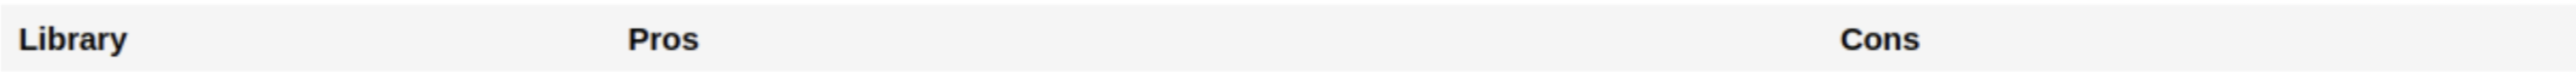

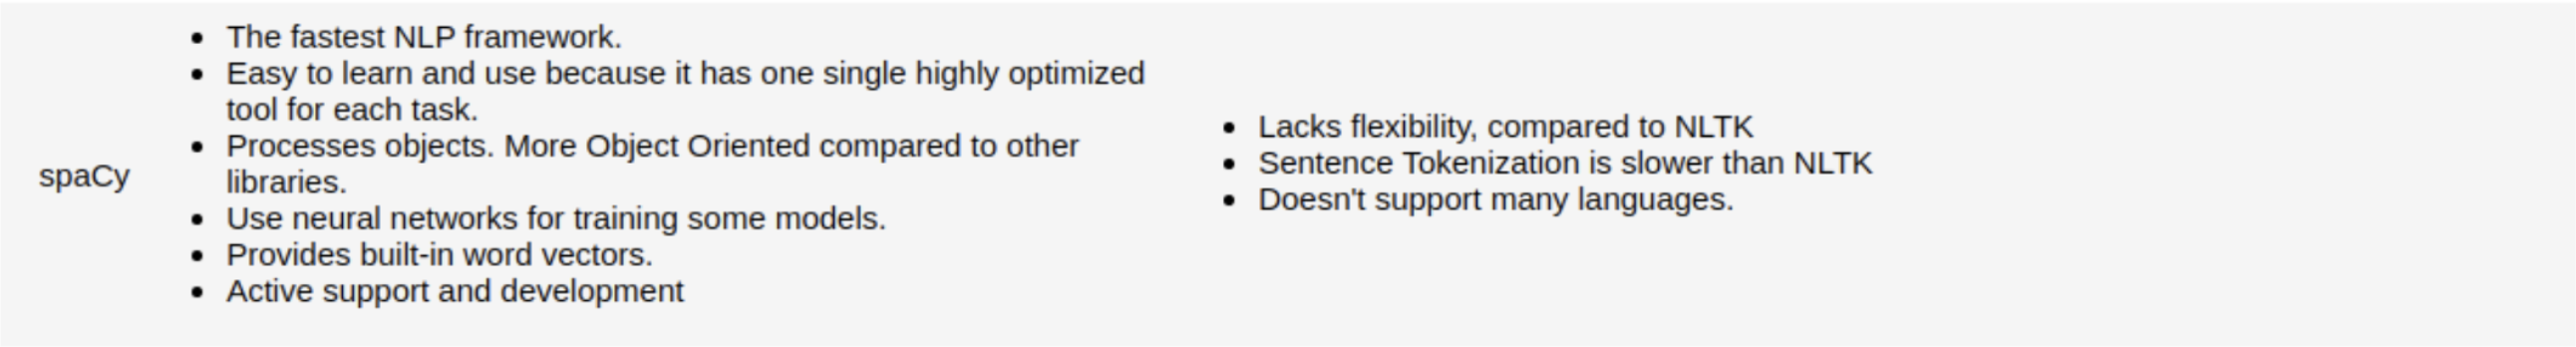

# References

https://medium.com/@nikhilpinnaparaju/architecture-design-for-an-nlp-library-ddd1649a090d

https://spacy.io/usage/spacy-101#annotations-pos-deps

https://towardsdatascience.com/ner-with-transformers-and-spacy-b3240bc65eb4

Project: https://towardsdatascience.com/machine-learning-for-text-classification-using-spacy-in-python-b276b4051a49